# Proyecto Final | Análisis de Sentimientos en Reseñas de Amazon mediante Técnicas de Big Data con PySpark
---

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4034.10 - Análisis de grandes volúmenes de datos**

Tecnológico de Monterrey

* Dr. Iván Olmos Pineda
* Mtra. Verónica Sandra Guzmán de Valle
* Mtro. Alberto Daniel Salinas Montemayor

**Proyecto Final** - 
Análisis de Sentimientos en Reseñas de Amazon mediante Técnicas de Big Data con PySpark

**Fecha de entrega** - 
22 de junio del 2025

---

**Equipo 37**

|  NOMBRE COMPLETO                        |     MATRÍCULA     |
| :-------------------------------------: |:-----------------:|
| Alejandro Díaz Villagómez               |  A01276769        |
| Alonso Pedrero Martínez                 |  A01769076        |
| César Iván Pedrero Martínez             |  A01366501        |
| Emiliano Saucedo Arriola                |  A01659258        |

# 0) Introducción
---

## Descripción del tema de interés
--- 

El presente proyecto tiene como objetivo principal analizar las reseñas de productos publicadas en Amazon utilizando herramientas de Big Data, específicamente PySpark. Amazon, como empresa de reconocimiento mundial tanto en el ámbito del comercio electrónico como en el desarrollo de soluciones tecnológicas, destacando su plataforma AWS (Amazon Web Services), constituye un referente global en el sector. Además, su posicionamiento como líder indiscutible del mercado de marketplaces la convierte en una fuente valiosa de datos masivos para análisis de comportamiento del consumidor.

La selección de este tema responde a intereses tanto profesionales como personales. Como programadores y consultores de software, frecuentemente trabajamos con clientes que solicitan el desarrollo de plataformas de venta en línea, mostrando un creciente interés en conocer la percepción y aceptación de sus productos en el mercado digital. En este contexto, resulta fundamental contar con herramientas que permitan identificar tendencias, analizar sentimientos y extraer patrones ocultos en las opiniones de los usuarios.

Por tanto, el objetivo general de este proyecto es construir una solución que, a partir del procesamiento y análisis de grandes volúmenes de reseñas, permita:

* Identificar el sentimiento general asociado a los productos (positivo, negativo o neutral).
* Detectar tendencias y patrones recurrentes en las opiniones de los consumidores.
* Apoyar en la toma de decisiones estratégicas de marketing y mejora de productos, proporcionando información valiosa y procesable a partir de los datos analizados.

Este enfoque no solo fortalece nuestras competencias técnicas en Big Data (e incluso en temas como procesamiento de lenguaje natural - NLP), sino que también aporta una herramienta práctica y directamente aplicable a nuestro entorno laboral actual.


Algunas aplicaciones potenciales son:

* **Mejora de Productos**: Analizar las reseñas puede ayudar a identificar problemas recurrentes o aspectos destacados de los productos, ayudando a los fabricantes a mejorar los diseños o la experiencia del cliente.
* **Atención al Cliente y Soporte**: Identificar rápidamente las reseñas negativas permite a las empresas abordar las preocupaciones de los clientes de manera eficiente, mejorando la satisfacción del cliente.
* **Sistemas de Recomendación**: El conjunto de datos puede usarse para mejorar los sistemas de recomendación, correlacionando las calificaciones de los productos, los sentimientos y las preferencias de los clientes.

## Selección del dataset
---

### **Selección**

| **Campo**              | **Detalle**                                                                                  |
|-------------------------|----------------------------------------------------------------------------------------------|
| Nombre del dataset      | Amazon-reviews                                                                               |
| Enlace                  | [Amazon-reviews en Kaggle](https://www.kaggle.com/datasets/machharavikiran/amazon-reviews?resource=download) |
| Publicador              | Machha Ravi Kiran                                                                            |
| Última actualización    | Hace aproximadamente 2 años                                                                  |
| Formato - Tamaño        | CSV - 3.68 GB                                                                                 |
| Fuente                  | Repositorio Kaggle (acceso público)                                                           |

---

### **Atributos del Conjunto de Datos**

| Columna           | Tipo de dato | Descripción                                      |
|-------------------|--------------|--------------------------------------------------|
| marketplace       | string       | Mercado donde se realizó la compra               |
| customer_id       | integer      | Identificador único del cliente                        |
| review_id         | string       | Identificador único de la reseña                 |
| product_id        | string       | Identificador del producto                      |
| product_parent    | integer      | Identificador de grupo o "padre" para productos similares o relacionados             |
| product_title     | string       | Nombre del producto                              |
| product_category  | string       | Categoría del producto                           |
| star_rating       | integer      | Calificación otorgada por el cliente (1-5)             |
| helpful_votes     | integer      | Número de votos útiles recibidos por la reseña    |
| total_votes       | integer      | Número total de votos recibidos                  |
| vine              | string       | Participación en el programa Vine de reseñas (Y para sí, N para no)    |
| verified_purchase | string       | Indicador de compra verificada (Y para sí, N para no)                  |
| review_headline   | string       | Encabezado de la reseña                          |
| review_body       | string       | Cuerpo del texto de la reseña                    |
| review_date       | date         | Fecha en que se realizó la reseña                |
| sentiment         | integer      | Valor de sentimiento asignado a la reseña (1 para positivo, 0 para negativo)       |

---

### **Descripción General**

Este conjunto de datos contiene reseñas de productos publicadas en Amazon, con un enfoque principal en productos electrónicos. La información es detallada, incluyendo las calificaciones de los usuarios, comentarios, votos útiles, y otros aspectos que permiten realizar un análisis profundo del comportamiento del consumidor y el sentimiento de las reseñas.

El dataset seleccionado cumple con los criterios establecidos para este proyecto, ya que está directamente relacionado con el análisis de reseñas de productos, presenta un tamaño adecuado para técnicas de Big Data, y su formato tabular favorece su procesamiento mediante PySpark. Además, la procedencia del dataset, proveniente de una fuente reconocida como Kaggle, garantiza además su calidad y fiabilidad para los fines académicos y profesionales de este trabajo.

---

# 1) Propuesta de solución
---

El desarrollo del presente proyecto plantea una solución integral y escalable para el análisis automatizado de sentimientos en reseñas de productos publicadas en Amazon, combinando técnicas de procesamiento distribuido con PySpark y modelos de aprendizaje supervisado. Esta propuesta busca responder eficazmente a los desafíos inherentes al tratamiento de datos textuales masivos, garantizando tanto la representatividad estadística de la muestra como la solidez y eficiencia computacional del modelo construido.

La estrategia metodológica implementada se fundamenta en el análisis de un conjunto de datos extenso, cuyo objetivo central es la predicción del sentimiento (positivo o negativo) expresado en cada reseña. Para alcanzar este fin, se diseñó un flujo de trabajo sistemático que abarca desde la caracterización inicial de la población y la construcción rigurosa de una muestra representativa, hasta la selección, entrenamiento y validación de modelos predictivos.

El proceso completo se estructura en las siguientes etapas clave:

1) Caracterización de la población
2) Construcción de una muestra representativa (M) y particiones Mi
3) Preprocesamiento y preparación de datos
4) Selección de métricas e identificación de algoritmos de aprendizaje
5) Ajuste de hiperparámetros mediante validación cruzada

Cada una de estas fases metodológicas será descrita en detalle en los apartados siguientes, destacando tanto las decisiones técnicas adoptadas como los fundamentos estadísticos y computacionales que sustentan su implementación.

## 1.1) Carga de datos
---

In [1]:
import findspark
from pyspark.sql import SparkSession, functions as F

findspark.init()
findspark.find()

'/Users/alejandrodiazvillagomez/Desktop/Proyecto-Big-Data-PySpark/.venv/lib/python3.12/site-packages/pyspark'

In [2]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

spark

25/06/21 23:18:10 WARN Utils: Your hostname, Alejandros-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.100.221 instead (on interface en0)
25/06/21 23:18:10 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/21 23:18:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
class FileManager():
    @staticmethod
    def open_csv_file(file_path : str):
        """
        This method opens a csv file with pyspark
        """
        csv_df = spark.read.csv(
            file_path,
            header=True,
            inferSchema=True,
            multiLine=True,
            escape="\"",
            quote="\""
        )

        # csv_df.show(truncate=20)

        return csv_df

In [4]:
import kagglehub

# Download latest version
FILE_PATH = kagglehub.dataset_download("machharavikiran/amazon-reviews")

print("Path to dataset files:", FILE_PATH)

df_reviews = FileManager.open_csv_file(FILE_PATH)
df_reviews.limit(10).toPandas()

/Users/alejandrodiazvillagomez/Desktop/Proyecto-Big-Data-PySpark/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/alejandrodiazvillagomez/.cache/kagglehub/datasets/machharavikiran/amazon-reviews/versions/1


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,22873041,R3ARRMDEGED8RD,B00KJWQIIC,335625766,Plemo 14-Inch Laptop Sleeve Case Waterproof Fa...,PC,5,0,0,N,Y,Pleasantly surprised,I was very surprised at the high quality of th...,2015-08-31,1
1,US,30088427,RQ28TSA020Y6J,B013ALA9LA,671157305,TP-Link OnHub AC1900 Wireless Wi-Fi Router,PC,5,24,31,N,N,OnHub is a pretty no nonsense type router that...,I am a Google employee and had to chance to us...,2015-08-31,1
2,US,20329786,RUXJRZCT6953M,B00PML2GQ8,982036237,AmazonBasics USB 3.0 A Male to A Male Cable - ...,PC,1,2,2,N,N,None of them worked. No functionality at all.,"Bought cables in 3ft, 6ft and 9ft. NONE of th...",2015-08-31,0
3,US,14215710,R7EO0UO6BPB71,B001NS0OZ4,576587596,Transcend P8 15-in-1 USB 2.0 Flash Memory Card...,PC,1,0,0,N,Y,just keep searching.,"nope, cheap and slow",2015-08-31,0
4,US,38264512,R39NJY2YJ1JFSV,B00AQMTND2,964759214,Aleratec SATA Data Cable 2.0 20in Serial ATA S...,PC,5,0,0,N,Y,Five Stars,Excellent! Great value and does the job.,2015-08-31,1
5,US,30548466,R31SR7REWNX7CF,B00KX4TORI,170101802,Kingston Digital MobileLite G4 USB 3.0 Multi-F...,PC,5,0,0,N,Y,"Good quality, works well and compact","Good quality,works well and compact size",2015-08-31,1
6,US,589298,RVBP8I1R0CTZ8,B00P17WEMY,206124740,White 9 Inch Unlocked Dual Sim Card Phone Tabl...,PC,3,1,2,N,Y,in fact this is third China good. Demn s***,This demn tablet is just a Real Chinese produc...,2015-08-31,0
7,US,49329488,R1QF6RS1PDLU18,B00TR05L9Y,778403103,"Lenovo TAB2 A10 - 10.1"" 2-in-1 Tablet (1.5Ghz,...",PC,4,1,1,N,Y,Good,I am not sure I don't know if it is the tablet...,2015-08-31,1
8,US,50728290,R23AICGEDAJQL1,B0098Y77OG,177098042,Acer,PC,1,0,0,N,Y,You get what you pay for,"After exactly 45 days, the screen went dark. P...",2015-08-31,0
9,US,37802374,R2EY3N4K9W19UP,B00IFYEYXC,602496520,AzureWave Broadcom BCM94352HMB 802.11/ac/867Mb...,PC,5,3,4,N,Y,Great for Windows 7 Laptop!,Replaced my Intel Centrino 2230 with the BCM94...,2015-08-31,1


## 1.2) Caracterización de la población
---

La caracterización de la población constituye una etapa crítica en todo proceso de análisis basado en muestreo. Su objetivo es identificar las propiedades generales de la población objetivo (`𝑃`) mediante un conjunto de variables que capturen diferencias y similitudes significativas entre los registros, y que sirvan como base para diseñar una estrategia de particionamiento representativa, libre de sesgos y alineada con los objetivos analíticos del proyecto.

Para ello, se seleccionaron variables con alto poder explicativo, dominio discretizable, baja proporción de valores nulos y relevancia directa en el contexto del análisis de sentimientos. Esta selección permite generar particiones homogéneas y comparables, facilitar la interpretación de resultados y detectar patrones comportamentales relevantes.

In [5]:
# Descripción general de columnas del DataFrame
df_reviews.printSchema()

root
 |-- marketplace: string (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: integer (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- sentiment: integer (nullable = true)



En primero instancia, se descartaron aquellas variables que, por su naturaleza, no aportaban valor analítico en esta etapa o introducían alta cardinalidad innecesaria:

* Identificadores únicos como customer_id, review_id, product_id, product_parent, y product_title actúan como claves o agrupadores, pero no representan comportamientos colectivos.
* Variables constantes como marketplace y product_category no ofrecen variabilidad interna, al contener un único valor en todo el dataset.
* Campos textuales como review_headline y review_body, aunque esenciales para el análisis de sentimiento, presentan cardinalidad extremadamente alta y no son adecuados para la segmentación estadística inicial.

Por otro lado, las siguientes variables han sido identificadas como relevantes para caracterizar los patrones de comportamiento en las reseñas de Amazon:

| **Variable**           | **Tipo / Dominio** | **Justificación**                                                                    |
| ---------------------- | ------------------ | ------------------------------------------------------------------------------------ |
| **star_rating**       | {1, 2, 3, 4, 5}    | Indicador directo de satisfacción; presenta sesgo positivo característico.           |
| **helpful_votes**     | Enteros ≥ 0        | Mide el impacto social de una reseña; distribución long-tail significativa.          |
| **total_votes**       | Enteros ≥ 0        | Complementa `helpful_votes`; permite calcular ratios de utilidad percibida.          |
| **sentiment**          | {0, 1}             | Variable objetivo del proyecto; correlacionada con `star_rating`.                    |
| **verified_purchase** | {'Y', 'N'}         | Refleja la autenticidad de la reseña; mayor credibilidad en valores 'Y'.             |
| **vine**               | {'Y', 'N'}         | Distingue reseñas orgánicas de aquellas incentivadas (programa Vine de Amazon).      |
| **review_date**       | Fechas (1999–2015) | Permite detectar estacionalidades y cambios de comportamiento a lo largo del tiempo. |

Cada una de estas variables aporta una dimensión única al análisis, ya sea desde una perspectiva temporal, de credibilidad, de popularidad o de valoración explícita del producto.

In [6]:
# Conteo de valores únicos por columna de interés
columns_to_explore = ["star_rating", "helpful_votes", "total_votes", 
                      "sentiment", "verified_purchase", "vine", "review_date"]

for col_name in columns_to_explore:
    print(f"\nDistribución para columna: {col_name}")
    df_reviews.groupBy(col_name).count().orderBy(F.desc("count")).show(truncate=False)


Distribución para columna: star_rating


+-----------+-------+
|star_rating|count  |
+-----------+-------+
|5          |4105687|
|4          |1168208|
|1          |756857 |
|3          |513656 |
|2          |362156 |
+-----------+-------+


Distribución para columna: helpful_votes


+-------------+-------+
|helpful_votes|count  |
+-------------+-------+
|0            |5018293|
|1            |935789 |
|2            |331921 |
|3            |171794 |
|4            |100548 |
|5            |66264  |
|6            |46064  |
|7            |34218  |
|8            |25910  |
|9            |20432  |
|10           |16558  |
|11           |13437  |
|12           |11310  |
|13           |9539   |
|14           |8257   |
|15           |7078   |
|16           |6313   |
|17           |5520   |
|18           |4772   |
|19           |4277   |
+-------------+-------+
only showing top 20 rows


Distribución para columna: total_votes


+-----------+-------+
|total_votes|count  |
+-----------+-------+
|0          |4546914|
|1          |1041522|
|2          |433014 |
|3          |228941 |
|4          |144506 |
|5          |95190  |
|6          |66824  |
|7          |51093  |
|8          |39390  |
|9          |30263  |
|10         |25452  |
|11         |20218  |
|12         |17324  |
|13         |14700  |
|14         |12613  |
|15         |10742  |
|16         |9636   |
|17         |8308   |
|18         |7367   |
|19         |6410   |
+-----------+-------+
only showing top 20 rows


Distribución para columna: sentiment


+---------+-------+
|sentiment|count  |
+---------+-------+
|1        |5273895|
|0        |1632669|
+---------+-------+


Distribución para columna: verified_purchase


+-----------------+-------+
|verified_purchase|count  |
+-----------------+-------+
|Y                |6047075|
|N                |859489 |
+-----------------+-------+


Distribución para columna: vine


+----+-------+
|vine|count  |
+----+-------+
|N   |6870336|
|Y   |36228  |
+----+-------+


Distribución para columna: review_date


+-----------+-----+
|review_date|count|
+-----------+-----+
|2015-01-05 |16067|
|2015-01-04 |15720|
|2015-01-03 |13931|
|2015-01-07 |13375|
|2014-12-29 |12523|
|2015-01-09 |12071|
|2014-12-31 |11744|
|2015-02-23 |11334|
|2015-01-06 |11056|
|2015-01-12 |11050|
|2015-01-01 |10931|
|2014-01-03 |10849|
|2015-02-18 |10828|
|2015-01-13 |10828|
|2015-01-14 |10517|
|2015-06-03 |10513|
|2015-01-20 |10482|
|2015-02-24 |10389|
|2015-02-04 |10383|
|2015-02-17 |10319|
+-----------+-----+
only showing top 20 rows



Para el diseño de la muestra estratificada y la construcción de particiones `𝑀𝑖`, se eligió un subconjunto de tres variables categóricas: `star_rating`, `verified_purchase` y `vine`. Esta decisión se fundamenta en los siguientes criterios:

* **Relevancia analítica directa**:
    * star_rating refleja la evaluación explícita del usuario, estrechamente vinculada con el sentimiento.
    * verified_purchase permite distinguir reseñas de compradores auténticos, clave para evitar sesgos.
    * vine identifica reseñas incentivadas, útiles para analizar diferencias en el tono o contenido.

* **Viabilidad práctica**:
    * Incluir todas las variables conduciría a una explosión combinatoria de particiones con escasa representatividad en algunas celdas. El uso de estas tres variables permite mantener interpretabilidad sin perder granularidad analítica.


Esta caracterización fue esencial para garantizar que los modelos entrenados fueran evaluados sobre segmentos de la población con comportamiento representativo y coherente, evitando conclusiones sesgadas o limitadas a subconjuntos no generalizables.


In [7]:
# Estadísticas descriptivas para columnas numéricas
df_reviews.select("star_rating", "helpful_votes", "total_votes").summary().show()

+-------+-----------------+------------------+------------------+
|summary|      star_rating|     helpful_votes|       total_votes|
+-------+-----------------+------------------+------------------+
|  count|          6906564|           6906564|           6906564|
|   mean|4.086460937739808|1.4844511684826203|1.9620770907212328|
| stddev|1.362854001234071| 41.49142556564166| 43.07079218821245|
|    min|                1|                 0|                 0|
|    25%|                4|                 0|                 0|
|    50%|                5|                 0|                 0|
|    75%|                5|                 1|                 1|
|    max|                5|             47524|             48362|
+-------+-----------------+------------------+------------------+



Los resultados estadísticos muestran una clara concentración de reseñas con calificaciones altas. La mediana de `star_rating` es 5, lo que indica una fuerte tendencia positiva en la percepción de los productos. Tanto `helpful_votes` como `total_votes` presentan una distribución fuertemente asimétrica (sesgo a la derecha), con valores medios bajos pero máximos extremadamente altos. Esto sugiere que la mayoría de las reseñas tienen poca interacción, mientras que un pequeño número recibe una gran cantidad de atención por parte de la comunidad. Estos patrones refuerzan la importancia de considerar técnicas de muestreo que garanticen la representatividad de todos los segmentos, incluyendo casos minoritarios pero influyentes.

## 1.3) Construcción de una muestra representativa (M) y particiones Mi
---

Una vez caracterizada la población, se procedió a la construcción de una muestra representativa denominada `𝑀`, con el propósito de reducir la escala del conjunto de datos original sin perder su riqueza estructural ni comprometer la validez estadística de los análisis posteriores. Esta etapa es especialmente relevante en entornos de Big Data, donde el volumen de información puede superar la capacidad operativa de los sistemas y dificultar tanto el entrenamiento de modelos como la evaluación exploratoria detallada.

### 1.3.1) Analizar la Distribución de las Variables Categóricas

In [8]:
categorical_cols = ["verified_purchase", "vine"]

print("--- Análisis de la Distribución de la Población (df_reviews) ---")

# Contar las ocurrencias de cada combinación de las variables categóricas
population_distribution = df_reviews.groupBy(categorical_cols).count()
population_distribution = population_distribution.withColumn(
    "percentage", (F.col("count") / df_reviews.count()) * 100
).orderBy(categorical_cols)

print("\nDistribución de las combinaciones en la población:")
population_distribution.toPandas()

--- Análisis de la Distribución de la Población (df_reviews) ---



Distribución de las combinaciones en la población:


,verified_purchase,vine,count,percentage
0,N,N,823420,11.922281
1,N,Y,36069,0.522242
2,Y,N,6046916,87.553174
3,Y,Y,159,0.002302


En esta etapa del proceso, se realiza un análisis exploratorio de la distribución de la población original (`df_reviews`) con base en dos variables categóricas seleccionadas: `verified_purchase` y `vine`. En esta ocasión se decidió excluir la variable `star_rating` del conjunto de variables de caracterización. Esta decisión responde a un hallazgo clave derivado del análisis supervisado anterior, donde se identificó que `star_rating` guarda una correlación directa y significativa con la variable objetivo `sentiment`, lo cual podría introducir un sesgo indeseado en la construcción de la muestra representativa. Mantener únicamente variables neutras y no directamente relacionadas con la etiqueta de salida garantiza una segmentación más imparcial y metodológicamente sólida.

El análisis de distribución revela que la gran mayoría de las observaciones corresponde a reseñas verificadas (`verified_purchase = Y`) y no asociadas al programa Vine (`vine = N`), representando aproximadamente el 87.55% del total. Otras combinaciones, como reseñas no verificadas (`verified_purchase = N`) o aquellas marcadas como parte del programa Vine (`vine = Y`), conforman proporciones mucho menores. Este paso es fundamental ya que permite identificar las proporciones reales de cada estrato dentro de la población y constituye la base para una posterior selección muestral proporcional, asegurando que la muestra `𝑀` sea verdaderamente representativa de la población `𝑃`.

### 1.3.2) Determinar el Tamaño de la Muestra (M)

In [9]:
# Vamos a definir un tamaño de muestra. Para este ejemplo, usemos el 10% del total de registros.
sample_fraction = 0.1
total_population_count = df_reviews.count()
sample_size = int(total_population_count * sample_fraction)

print(f"Total de registros en la población: {total_population_count}")
print(f"Tamaño de la muestra deseado (aprox. {sample_fraction*100}%): {sample_size}")

Total de registros en la población: 6906564
Tamaño de la muestra deseado (aprox. 10.0%): 690656


En esta segunda etapa se define el tamaño de la muestra `𝑀` que será extraída de la población `𝑃`, con el propósito de construir un subconjunto representativo que preserve la estructura y diversidad de los datos originales. Para este fin, se estableció un valor de muestreo equivalente al **10% del total de registros disponibles**. Esta proporción fue seleccionada con base en criterios metodológicos y computacionales, considerando tanto la escala del conjunto de datos como los objetivos del análisis posterior.

Desde el punto de vista estadístico, una fracción del 10% resulta suficiente para capturar patrones relevantes y garantizar una adecuada representación de las combinaciones categóricas identificadas previamente, incluso en escenarios donde algunos estratos presentan baja frecuencia relativa. Además, esta decisión permite mantener un equilibrio adecuado entre la fidelidad de la muestra y la eficiencia computacional, particularmente importante en contextos de Big Data donde el volumen de información puede impactar significativamente el rendimiento de las operaciones.

Al delimitar explícitamente el tamaño de la muestra, se establece un marco cuantitativo claro que orienta la distribución proporcional de las instancias en cada segmento, evitando sesgos y distorsiones en las etapas siguientes del análisis.

### 1.3.3) Calcular el Número de Instancias por Partición (Mi)

In [10]:
# Calcular el número de instancias para cada combinación en la muestra
print("--- Distribución Deseada de la Muestra y Conteo por Partición ---")

sample_distribution = population_distribution.withColumn(
    "sample_count", F.round(F.col("percentage") * sample_size / 100)
)
sample_distribution.toPandas() # Muestra el conteo deseado para cada partición en la muestra

# Convertir a un diccionario para facilitar la selección de la muestra estratificada
sample_counts_dict = {
    tuple(row[col] for col in categorical_cols): row["sample_count"]
    for row in sample_distribution.collect()
}
sample_counts_dict

--- Distribución Deseada de la Muestra y Conteo por Partición ---


{('N', 'N'): 82342.0,
 ('N', 'Y'): 3607.0,
 ('Y', 'N'): 604691.0,
 ('Y', 'Y'): 16.0}

Se procede a determinar la distribución deseada de la muestra representativa `𝑀`, en función de las proporciones previamente observadas en la población `𝑃` respecto a las variables categóricas seleccionadas: `verified_purchase` y `vine`. Para ello, se calcula la cantidad de instancias que cada combinación posible de estas variables deberá contener dentro de la muestra, con base en su porcentaje de representación original y el tamaño total previamente definido para `𝑀` (10% del total poblacional).

Este procedimiento tiene como objetivo preservar la estructura interna de la población, garantizando que la muestra conserve de manera proporcional la diversidad y distribución de los distintos perfiles existentes en los datos. En otras palabras, se busca construir una muestra estratificada que refleje fielmente la composición original de los datos en términos de las variables de caracterización elegidas.

Los resultados obtenidos muestran que la combinación más frecuente es `('Y', 'N')`, correspondiente a registros de usuarios que realizaron una compra verificada y que no pertenecen al programa Vine, con una representación esperada de aproximadamente 604,691 registros dentro de la muestra. Le siguen `('N', 'N')` con 82,342 registros, `('N', 'Y')` con 3,607, y `('Y', 'Y')` con solo 16 registros. Esta distribución, aunque desigual, es consistente con la frecuencia real de ocurrencia en la población y será la base para extraer de forma estratificada los registros que compondrán la muestra final `𝑀`.

Este paso es esencial para asegurar que las particiones `𝑀𝑖`, construidas posteriormente a partir de `𝑀`, sean equilibradas, realistas y libres de sesgos de representación, lo que a su vez fortalece la validez estadística de cualquier análisis futuro derivado del conjunto muestral.

### 1.3.4) Generar la Muestra (M) de forma estratificada

In [11]:
# Para asegurar la representatividad, realizaremos un muestreo estratificado.
# Esto implica muestrear cada "estrato" (combinación de categorías) por separado para asegurar las proporciones deseadas.
print("--- Generando la Muestra (M) de forma Estratificada ---")

sample_df = spark.createDataFrame([], df_reviews.schema) # DataFrame vacío para la muestra

for combo_values, count_needed in sample_counts_dict.items():
    if count_needed > 0:
        filter_condition = None
        for i, col_name in enumerate(categorical_cols):
            if filter_condition is None:
                filter_condition = (F.col(col_name) == combo_values[i])
            else:
                filter_condition = filter_condition & (F.col(col_name) == combo_values[i])

        # Seleccionar las filas para el estrato actual
        stratum_df = df_reviews.filter(filter_condition)

        # Si el estrato tiene menos registros de los que necesitamos, tomamos todos.
        # Si tiene más, tomamos una muestra aleatoria del tamaño deseado.
        current_stratum_count = stratum_df.count()
        if current_stratum_count > 0:
            if count_needed < current_stratum_count:
                # Tomamos una muestra aleatoria del tamaño deseado
                fraction = count_needed / current_stratum_count
                sampled_stratum = stratum_df.sample(withReplacement=False, fraction=fraction, seed=42)
            else:
                # Si no hay suficientes registros en el estrato, tomamos todos los disponibles
                sampled_stratum = stratum_df

            # Unir al DataFrame de la muestra principal
            sample_df = sample_df.unionAll(sampled_stratum)

print(f"Número de registros en la muestra final (M): {sample_df.count()}")
print("Muestra (M) generada. Mostrando las primeras 5 filas:")
sample_df.limit(5).toPandas()

--- Generando la Muestra (M) de forma Estratificada ---


Número de registros en la muestra final (M): 691829
Muestra (M) generada. Mostrando las primeras 5 filas:


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,112405,RKP98DQX0VTFZ,B00T91YABQ,541159143,Polare Thick Full Grain Leather Shoulder Brief...,PC,5,1,3,N,N,Awesome Bag!,I bought this bag looking for a briefcase that...,2015-08-31,1
1,US,46558847,R3MSK0V0TDL01L,B00TKFDFW6,701421383,CybertronPC SOKOM-I Gaming Desktop - AMD FX-63...,PC,5,1,1,N,N,It's a Monster Machine,I bought a slightly modified version of this C...,2015-08-31,1
2,US,19852854,RM6KESMRIY1UQ,B00746W9F2,41875278,Apple iPad mini,PC,5,0,0,N,N,Five Stars,very good price!,2015-08-31,1
3,US,13443121,R2A948UZQGFZHO,B00KQE99C0,348236562,Standing Protective Case for Fire HD 7 (4th Ge...,PC,5,0,0,N,N,Five Stars,"Love it, it protects the screen and I love the...",2015-08-31,1
4,US,107911,RS1QTAUB8FJI0,B00JQZJ75E,937857628,iXCC Silicon Case Cover for Apple iPad Mini,PC,5,0,0,N,N,5 stars,Nice case for the money. It is comfortable to ...,2015-08-31,1


En este paso se lleva a cabo la generación efectiva de la muestra `𝑀` mediante un proceso de **muestreo estratificado**. A diferencia de un muestreo aleatorio simple, el enfoque estratificado garantiza que cada subconjunto de interés (en este caso, definido por las combinaciones de las variables categóricas `verified_purchase` y `vine`) esté adecuadamente representado en la muestra final, en proporciones equivalentes a las observadas en la población `𝑃`.

Para ello, se recorre cada combinación posible de valores previamente identificada y se extrae un subconjunto de registros desde el conjunto poblacional, aplicando una lógica condicional que asegura tanto la proporcionalidad deseada como la eficiencia computacional. En particular, cuando un estrato contiene más registros que los requeridos, se realiza un muestreo aleatorio sin reemplazo proporcional a su tamaño; en contraste, si el estrato es más pequeño que la cantidad esperada, se conservan todos los registros disponibles. Este tratamiento dual permite construir una muestra robusta, incluso en presencia de categorías minoritarias o desbalanceadas.

El resultado final fue la obtención de una muestra `𝑀` con 691,829 registros, cifra levemente superior al valor estimado originalmente (690,656) debido a efectos de redondeo y disponibilidad real de datos en algunos estratos. Esta ligera discrepancia es aceptable dentro de un marco de análisis exploratorio y no compromete la representatividad del conjunto, ya que la preservación de las proporciones entre categorías sigue siendo el criterio rector de la construcción muestral.

Como se puede apreciar, este paso sienta las bases para asegurar que cualquier inferencia posterior, basada en la muestra `𝑀` o en sus particiones `𝑀𝑖`, no esté sesgada por sobre o subrepresentación de ciertos grupos, manteniendo la integridad metodológica del estudio.

### 1.3.5) Crear las Particiones (Mi)

In [12]:
# Una vez que tenemos la muestra (sample_df), las particiones Mi son simplemente subconjuntos de esta 
# muestra basados en las combinaciones de las variables categóricas.
# No es necesario almacenar cada Mi por separado si se va a trabajar con ellos de forma iterativa o agrupada. 
# Podemos simplemente agrupar por las variables categóricas cuando sea necesario.

# Si se necesita acceder a una partición específica (Mi), se puede filtrar así:
# Ejemplo: Partición para verified_purchase='Y', vine='N'
mi_example = sample_df.filter((F.col("verified_purchase") == "Y") &
                              (F.col("vine") == "N"))
print(f"\nEjemplo de partición M_i (verified_purchase='Y', vine='N'): {mi_example.count()} registros")
mi_example.limit(5).toPandas()


Ejemplo de partición M_i (verified_purchase='Y', vine='N'): 605672 registros


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,37802374,R2EY3N4K9W19UP,B00IFYEYXC,602496520,AzureWave Broadcom BCM94352HMB 802.11/ac/867Mb...,PC,5,3,4,N,Y,Great for Windows 7 Laptop!,Replaced my Intel Centrino 2230 with the BCM94...,2015-08-31,1
1,US,29333557,R3G4RT3EQ9RSY7,B00MA40W9I,535866197,Egoway® New Laptop Battery for Apple A1309 A12...,PC,1,0,0,N,Y,Totally wasted $60 on this battery,Totally wasted $60 on this battery. Didn't wo...,2015-08-31,0
2,US,16160990,RW9VR7UKL3E69,B00HPQ0H0K,176437370,ARCTIC S111 USB-Powered Portable Stereo Speake...,PC,2,0,0,N,Y,tinny sounding,tinny weak sound,2015-08-31,0
3,US,48701722,R7ER63LS7Q1O5,B00RXEWOAA,540891596,"3.5"" USB External Floppy Disk Drive Portable 1...",PC,5,0,0,N,Y,Five Stars,Love it,2015-08-31,1
4,US,19280847,RAYGOWHX4H47,B001J226JQ,210607495,Generic USB to 9-pin Serial Port Adapter,PC,5,0,0,N,Y,Five Stars,perfect,2015-08-31,1


In [13]:
print("--- Creando las Particiones (Mi) ---")

# Verificamos que las proporciones se mantengan.
sample_actual_distribution = sample_df.groupBy(categorical_cols).count()
sample_actual_distribution = sample_actual_distribution.withColumn(
    "percentage", (F.col("count") / sample_df.count()) * 100
).orderBy(categorical_cols)

print("\nDistribución REAL de las combinaciones en la Muestra (M):")
sample_actual_distribution.toPandas()

--- Creando las Particiones (Mi) ---



Distribución REAL de las combinaciones en la Muestra (M):


,verified_purchase,vine,count,percentage
0,N,N,82555,11.932862
1,N,Y,3583,0.517903
2,Y,N,605672,87.546489
3,Y,Y,19,0.002746


En esta última fase del proceso se formaliza la creación de las particiones `𝑀𝑖`, definidas como subconjuntos disjuntos de la muestra `𝑀`, cuya segmentación responde a las combinaciones únicas de las variables categóricas seleccionadas. Dado que la muestra fue construida de manera estratificada en función de estas mismas variables, el agrupamiento por sus valores permite recuperar de forma directa cada una de las particiones sin necesidad de duplicar datos ni mantener estructuras adicionales.

Este diseño no solo reduce el costo computacional, sino que ofrece flexibilidad metodológica: cada partición puede ser invocada y procesada dinámicamente según los requerimientos del análisis posterior. Por ejemplo, acceder a la partición 
`𝑀𝑖` correspondiente a `verified_purchase='Y'` y `vine='N'` permite trabajar exclusivamente con ese segmento de usuarios, aislando su comportamiento o características para estudios comparativos.

Al verificar la distribución real de las combinaciones dentro de la muestra generada, se confirma que las proporciones han sido exitosamente conservadas. Las diferencias con respecto a los valores esperados son mínimas y atribuibles al redondeo y a la disponibilidad efectiva de registros dentro de ciertos estratos, sin comprometer la validez del enfoque.

Este paso final garantiza que cada partición sea estadísticamente coherente con su representación en la población `𝑃`, eliminando riesgos de sesgo por subrepresentación o sobreajuste a grupos específicos. Este diseño habilita un análisis posterior más sólido y confiable, ajustado a los principios fundamentales de muestreo en escenarios de datos masivos.

## 1.4) Identificación de algoritmos de aprendizaje y selección de métricas
---

### 1.4.1) Identificación de algoritmos de aprendizaje

#### 1.4.1.1) Modelo supervisado

Para abordar la tarea de clasificación binaria del sentimiento (positivo o negativo) en las reseñas de productos, se seleccionó el algoritmo `RandomForestClassifier` del módulo `pyspark.ml.classification` como modelo de aprendizaje supervisado. Esta elección fue sustentada tanto en criterios técnicos como en consideraciones prácticas vinculadas a la naturaleza del problema y las características del conjunto de datos.

El modelo en cuestión es una técnica de ensamblado basada en árboles de decisión que ofrece una excelente relación entre precisión, robustez y eficiencia computacional, lo cual lo hace especialmente adecuado para contextos de Big Data como el presente. Las razones principales de su elección se detallan a continuación:

* **Adecuado para clasificación binaria**: El problema se define como una clasificación binaria (`sentiment` = 0 ó 1), una tarea donde Random Forest ha demostrado un desempeño sobresaliente en múltiples estudios y aplicaciones prácticas.
* **Manejo eficiente de datos numéricos y categóricos codificados**: Todas las variables seleccionadas (`star_rating`, `helpful_votes`, `total_votes`, `verified_purchase_index`, `vine_index`) son de tipo numérico o han sido codificadas previamente mediante `StringIndexer`, lo cual es completamente compatible con este algoritmo sin necesidad de transformaciones adicionales.
* **Robustez frente a outliers y datos ruidosos**: Random Forest no se ve significativamente afectado por valores atípicos o ruido en los datos, como aquellos observados en las variables `helpful_votes` y `total_votes`, por lo que evita la necesidad de aplicar estrategias de eliminación o transformación adicional de estos valores.
* **No requiere normalización de variables**: A diferencia de algoritmos como la regresión logística o las redes neuronales, Random Forest no depende de la escala de las variables de entrada, lo que reduce el número de pasos de preprocesamiento requeridos.
* **Capacidad para manejar datos desbalanceados**: Aunque el dataset presenta un desbalance de clases (76% positivas, 24% negativas), Random Forest puede mitigar este efecto mediante su mecanismo de muestreo aleatorio (bootstrap sampling) en cada árbol.
* **Interpretabilidad y análisis de importancia de variables**: Una ventaja adicional del modelo es su capacidad para generar métricas de importancia de características, lo cual es valioso para interpretar qué variables contribuyen más a la predicción del sentimiento.
**Costo computacional razonable**: Dado que el entrenamiento se realiza en un entorno distribuido con PySpark, el uso de `RandomForestClassifier` permite aprovechar eficientemente los recursos disponibles, obteniendo buenos resultados sin incurrir en el alto costo computacional que requerirían otros modelos como `GBTClassifier` o `MultilayerPerceptronClassifier`.

#### **Comparación con otros modelos**
| Modelo                 | Motivo por el cual no fue seleccionado                                     |
| ---------------------- | -------------------------------------------------------------------------- |
| `LogisticRegression`   | Requiere normalización y es más sensible a desbalance de clases.           |
| `MultilayerPerceptron` | Demanda tuning de hiperparámetros, normalización y mayor poder de cómputo. |
| `GBTClassifier`        | Más preciso en algunos casos, pero considerablemente más costoso.          |


#### 1.4.1.2) Modelo no supervisado

Para la etapa de aprendizaje no supervisado, se selecciona el algoritmo `K-Means Clustering` como el método más adecuado para llevar a cabo un análisis de agrupamiento sobre el conjunto `feature_cols_v2`, el cual no incluye la variable `star_rating`. Las razones para esta decisón se presentan a continuación:

* **Consistencia con el modelo supervisado corregido**: Se excluye la variable `star_rating`, que en experimentos previos demostró tener una correlación directa con la variable objetivo `sentiment`, generando resultados artificialmente perfectos (**overfitting**).
* **Evitar fuga de información (data leakage)**: Eliminar `star_rating` del conjunto de características asegura que los clusters generados surjan de patrones genuinos, sin ser inducidos por una variable que actúa como proxy de la etiqueta.
* **Exploración honesta de estructura latente**: Al omitir variables altamente correlacionadas con la etiqueta, se permite al modelo encontrar patrones naturales y no triviales que podrían revelar nuevos perfiles de reseñas o usuarios dentro de los datos.

K-Means es un algoritmo ampliamente utilizado en problemas de agrupamiento debido a su eficiencia computacional, simplicidad conceptual y buena escalabilidad para grandes volúmenes de datos. Estas cualidades resultan particularmente ventajosas en el contexto del presente proyecto, el cual opera sobre millones de registros dentro de un entorno distribuido basado en PySpark.

Las justificaciones de la elección de este modelo son:

* **Escalabilidad**: K-Means tiene una complejidad computacional baja (O(n·k·i)), lo que lo hace ideal para trabajar con conjuntos de datos de millones de registros como en el caso actual.
* **Compatibilidad con PySpark**: PySpark MLlib ofrece una implementación altamente optimizada de KMeans que se integra fácilmente con pipelines de transformación (`VectorAssembler`) y evaluación (`ClusteringEvaluator`).
* **Simplicidad interpretativa**: Los centroides obtenidos permiten caracterizar los grupos descubiertos con base en las variables seleccionadas, facilitando el análisis exploratorio.

#### **Comparación con otros modelos**
| Modelo                      | Motivo por el cual no fue seleccionado                                                                  |
|-----------------------------|---------------------------------------------------------------------------------------------------------|
| `GaussianMixture`           | Mayor costo computacional por manejo probabilístico y convergencia más lenta.                           |
| `PowerIterationClustering`  | Requiere configuración más compleja y se orienta a grafos o estructuras de conectividad específicas.    |
| `BisectingKMeans`           | Más útil para jerarquías de cluster; no aporta ventajas claras frente a K-Means en este contexto plano. |

### 1.4.2) Selección de métricas para medir calidad de resultados

Con el objetivo de evaluar la calidad de los resultados obtenidos a partir de los modelos implementados, es fundamental seleccionar cuidadosamente las **métricas de desempeño**, considerando no solo la naturaleza del algoritmo (supervisado o no supervisado), sino también el volumen de datos procesado y las implicaciones computacionales de cada métrica en un entorno de Big Data.

En el caso del modelo `RandomForestClassifier`, al tratarse de un enfoque supervisado orientado a la clasificación, se seleccionaron métricas estándar pero robustas que permiten evaluar el desempeño general y por clase del modelo. Específicamente, se consideran las siguientes: **accuracy, precision, recall y F1-score**, todas en su versión ponderada. Estas métricas permiten analizar no solo el número de aciertos globales, sino también la capacidad del modelo para distinguir correctamente entre las clases positivas y negativas, lo cual es especialmente relevante ante posibles desbalances en los datos. Adicionalmente, se utilizará la **matriz de confusión** como instrumento visual y cuantitativo que permite comprender la naturaleza de los errores cometidos (falsos positivos y falsos negativos), lo cual enriquece el análisis más allá de los valores promedio.

Por otro lado, para el modelo `KMeans`, al ser un algoritmo no supervisado de agrupamiento, las métricas tradicionales de clasificación no resultan aplicables. En su lugar, se optó por la utilización del **Silhouette Score**, el cual mide qué tan similares son los puntos dentro de un mismo clúster en comparación con puntos de otros clústers. Esta métrica, además de ser ampliamente aceptada en tareas de agrupamiento, resulta computacionalmente viable en PySpark y permite inferir si el número de clústers seleccionado es coherente con la estructura de los datos. Complementariamente, se evaluará la **coherencia semántica de los clústers obtenidos mediante inspección manual y análisis de centroides promedio**, especialmente al comparar los resultados con la variable de salida conocida, lo que permite explorar la alineación entre los patrones descubiertos de manera no supervisada y las etiquetas originales.

La selección de estas métricas responde a la doble necesidad de garantizar interpretabilidad y precisión en el análisis, al tiempo que se respeta la escalabilidad exigida por el tratamiento de grandes volúmenes de datos. La diversidad de enfoques implementados (supervisado y no supervisado) permite explorar diferentes dimensiones del comportamiento de los datos y establecer comparaciones que fortalecen la comprensión del problema y la calidad de las soluciones construidas.

## 1.5) Preprocesamiento y preparación de datos
---

### 1.5.1) Construcción Train – Test

In [14]:
# Definimos la proporción de división
train_ratio = 0.7
test_ratio = 1 - train_ratio
seed = 42

# Diccionarios para almacenar los conjuntos de entrenamiento y prueba por partición
train_partitions = {} # { (verified_purchase, vine): DataFrame_Tri }
test_partitions = {}  # { (verified_purchase, vine): DataFrame_Tsi }

# Obtenemos todas las combinaciones únicas de las variables categóricas en la muestra (M)
distinct_combinations = sample_df.select(categorical_cols).distinct().collect()
distinct_combinations

[Row(verified_purchase='N', vine='N'),
 Row(verified_purchase='N', vine='Y'),
 Row(verified_purchase='Y', vine='N'),
 Row(verified_purchase='Y', vine='Y')]

La definición de una proporción de **70/30** para los conjuntos de entrenamiento y prueba responde a una práctica comúnmente aceptada en el ámbito del análisis de datos, ya que permite un equilibrio adecuado entre aprendizaje y validación. El uso de una semilla asegura la reproducibilidad del proceso, lo cual es fundamental en entornos experimentales. 

Por otro lado, la identificación explícita de las combinaciones presentes en la muestra evita errores asociados al redondeo o a la ausencia de estratos poco frecuentes, garantizando que la división se realice únicamente sobre particiones efectivamente representadas. El resultado obtenido (cuatro combinaciones únicas) confirma que la muestra mantiene la diversidad estructural necesaria para una segmentación estratificada válida.

In [15]:
# Iteramos sobre cada combinación para crear las particiones Mi y dividirlas
for row in distinct_combinations:
    combo_values = tuple(row[col] for col in categorical_cols)
    print(f"\nProcesando partición Mi para: {combo_values}")

    # Aislamos la Partición Mi con apoyo de un filtro
    filter_condition = None
    for i, col_name in enumerate(categorical_cols):
        if filter_condition is None:
            filter_condition = (F.col(col_name) == combo_values[i])
        else:
            filter_condition = filter_condition & (F.col(col_name) == combo_values[i])

    mi_df = sample_df.filter(filter_condition)
    mi_count = mi_df.count()
    print(f"\tTamaño de Mi: {mi_count} registros")

    # Dividimos la Partición Mi en Tri y Tsi
    if mi_count > 0:
        # randomSplit distribuye los datos aleatoriamente según las proporciones dadas
        tri, tsi = mi_df.randomSplit([train_ratio, test_ratio], seed=seed)

        # Almacenar las particiones resultantes
        train_partitions[combo_values] = tri
        test_partitions[combo_values] = tsi

        print(f"\tTamaño de Tri: {tri.count()} registros")
        print(f"\tTamaño de Tsi: {tsi.count()} registros")
    else:
        print(f"\tPartición Mi vacía. No se generarán Tri y Tsi.")


Procesando partición Mi para: ('N', 'N')


	Tamaño de Mi: 82555 registros


	Tamaño de Tri: 57790 registros


	Tamaño de Tsi: 24765 registros

Procesando partición Mi para: ('N', 'Y')


	Tamaño de Mi: 3583 registros


	Tamaño de Tri: 2455 registros


	Tamaño de Tsi: 1128 registros

Procesando partición Mi para: ('Y', 'N')


	Tamaño de Mi: 605672 registros


	Tamaño de Tri: 424081 registros


	Tamaño de Tsi: 181591 registros

Procesando partición Mi para: ('Y', 'Y')


	Tamaño de Mi: 19 registros


	Tamaño de Tri: 16 registros


	Tamaño de Tsi: 3 registros


Con este código se hace la segmentación de la muestra representativa `𝑀` en subconjuntos de entrenamiento (`𝑇𝑟𝑖`) y prueba (`𝑇𝑠𝑖`) para cada una de las particiones `𝑀𝑖`, definidas previamente según las combinaciones únicas de las variables categóricas `verified_purchase` y `vine`. Esta estrategia garantiza que el proceso de entrenamiento y evaluación se lleve a cabo respetando la estructura interna de la población original, evitando así la introducción de sesgos derivados de una partición aleatoria no estratificada.

El método empleado consiste en filtrar individualmente cada estrato `𝑀𝑖`, y aplicar la función `randomSplit` de PySpark para generar las correspondientes divisiones con una proporción **70/30**. Esto permite mantener la representatividad estadística dentro de cada combinación de atributos. Los resultados muestran que la distribución se ha respetado incluso en estratos de baja frecuencia, como el caso de la combinación `('Y', 'Y')`, donde se preservó una división razonable de 16 observaciones para entrenamiento y 3 para prueba.

Esta partición controlada por estrato es especialmente valiosa en contextos donde existen desequilibrios severos entre categorías, ya que permite evaluar el desempeño del modelo de forma equitativa sobre todos los grupos relevantes. Además, al evitar el solapamiento entre `𝑇𝑟𝑖` y `𝑇𝑠𝑖`, se salvaguarda la independencia entre fases de entrenamiento y validación, requisito esencial para asegurar la robustez metodológica de los resultados.

In [16]:
# Verificamos las condiciones Tri Ç Tsi = Æ (no solapamiento) y la unión de todas las particiones = M
# Cabe destcar que la condición Tri Ç Tsi = Æ se garantiza por la función `randomSplit` de Spark
print("--- Verificación de las Condiciones ---")

# Unión de todos los Tri
all_tri_union = spark.createDataFrame([], sample_df.schema)
for combo, tri_df in train_partitions.items():
    all_tri_union = all_tri_union.unionAll(tri_df)

# Unión de todos los Tsi
all_tsi_union = spark.createDataFrame([], sample_df.schema)
for combo, tsi_df in test_partitions.items():
    all_tsi_union = all_tsi_union.unionAll(tsi_df)

# Unión de todos los Tri y Tsi
# Usamos distinct para manejar posibles duplicados si no hay garantía estricta
final_union_m = all_tri_union.unionAll(all_tsi_union).distinct()

print(f"Tamaño de la muestra original (M): {sample_df.count()}")
print(f"Tamaño de la unión de todos los Tri y Tsi: {final_union_m.count()}")

# Si los conteos coinciden, la condición se cumple.
if sample_df.count() == final_union_m.count():
    print("¡La condición de unión de particiones = M se cumple! Los conteos coinciden.")
else:
    print("Advertencia: Los conteos de la unión de particiones y la muestra M no coinciden.")

--- Verificación de las Condiciones ---


Tamaño de la muestra original (M): 691829


Tamaño de la unión de todos los Tri y Tsi: 691829


¡La condición de unión de particiones = M se cumple! Los conteos coinciden.


Una vez realizadas las divisiones `𝑇𝑟𝑖` y `𝑇𝑠𝑖` correspondientes a cada partición `𝑀𝑖`, se llevó a cabo un proceso de verificación para confirmar que se cumplan dos condiciones fundamentales de integridad en el diseño experimental: la no superposición entre conjuntos de entrenamiento y prueba, es decir, `𝑇𝑟𝑖 ∩ 𝑇𝑠𝑖 = ∅`, y la exhaustividad de la muestra, es decir, que la unión de todas las particiones `𝑇𝑟𝑖 ∪ 𝑇𝑠𝑖` sea equivalente al conjunto original `𝑀`.

La primera condición se garantiza implícitamente mediante el uso de la función `randomSplit` de PySpark, la cual está diseñada para generar subconjuntos mutuamente excluyentes a partir de un conjunto dado. En cuanto a la segunda condición, se construyó la unión de todas las particiones generadas y se aplicó una operación `distinct` para asegurar la unicidad de los registros. Al comparar el tamaño de esta unión con el total de registros de `𝑀`, se comprobó que ambos coinciden perfectamente, lo cual valida que no hubo pérdida ni duplicación de datos en el proceso de división.

### 1.5.2) Definición del preprocesamiento

In [17]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

# Convertir las columnas categóricas a índices numéricos
indexer_verified = StringIndexer(inputCol="verified_purchase", outputCol="verified_purchase_index", handleInvalid="skip")
indexer_vine = StringIndexer(inputCol="vine", outputCol="vine_index", handleInvalid="skip")

label_col = "sentiment"
label_indexer = StringIndexer(inputCol=label_col, outputCol="label")

In [18]:
# Manejo de valores nulos 
initial_cols_to_check_for_nulls = [
    "helpful_votes", 
    "total_votes", 
    "verified_purchase", 
    "vine", 
    "sentiment" # Label
]

sample_df_cleaned = sample_df.na.drop(subset=initial_cols_to_check_for_nulls)
print(f"Registros después de eliminar nulos: {sample_df_cleaned.count()} (original: {sample_df.count()})")

Registros después de eliminar nulos: 691829 (original: 691829)


Para validar la integridad del conjunto de datos antes de su procesamiento, se realizó una verificación de valores nulos únicamente sobre un subconjunto específico de columnas consideradas críticas para la construcción de modelos de aprendizaje automático:

* `helpful_votes` y `total_votes`: Representan variables numéricas que aportan información cuantitativa relevante sobre la recepción de la reseña por parte de otros usuarios, y que serán utilizadas como parte del vector de características.
* `verified_purchase` y `vine`: Son variables categóricas claves utilizadas en la caracterización de la población (Mi), e influyen directamente en la segmentación y entrenamiento del modelo.
* `sentiment`: constituye la variable objetivo en el enfoque supervisado, por lo que cualquier registro con valor nulo en esta columna sería inutilizable para entrenamiento o validación.

Otras columnas presentes en el dataset, como `review_id`, `product_id`, `product_title`, `review_body`, entre otras, no se consideran directamente en la construcción del vector de características ni en la partición estratificada: los identificadores no aportan valor predictivo, mientras que las columnas textuales podrían ser relevantes en análisis futuros mediante técnicas de procesamiento de lenguaje natural (NLP), pero no forman parte del enfoque estructurado actual. Por tanto no condicionan la validez del modelo si contienen valores nulos. Esto permite optimizar el proceso de limpieza, evitando descartes innecesarios de registros útiles. 

En este caso particular, la verificación indicó que no existen registros con valores nulos en las columnas críticas seleccionadas, lo cual confirma que:

* El conjunto de datos `sample_df` es íntegro desde el punto de vista del modelado
* No es necesario rehacer el muestreo estratificado ni las divisiones en entrenamiento/prueba (`𝑇𝑟𝑖`/`𝑇𝑠𝑖`)
* Se puede continuar con el pipeline de preprocesamiento sin riesgo de inconsistencias.

Este control constituye una etapa esencial dentro de los principios de data readiness, asegurando que los modelos construidos operen sobre datos válidos, completos y coherentes.

In [19]:
# Definición de las columnas que serán ensambladas en el vector de características
feature_cols_for_assembler = [
    "helpful_votes", 
    "total_votes", 
    "verified_purchase_index", 
    "vine_index"
]

vector_assembler = VectorAssembler(inputCols=feature_cols_for_assembler, outputCol="raw_features")

In [20]:
# Código para escalar las características
scaler = StandardScaler(
    inputCol="raw_features", 
    outputCol="scaled_features", 
    withStd=True, 
    withMean=False
)

Con el objetivo de preparar los datos para su uso en modelos de aprendizaje automático, se diseñó un proceso de preprocesamiento robusto y escalable, alineado con las mejores prácticas en contextos de Big Data. Este proceso incluye las siguientes etapas clave:

1. **Conversión de variables categóricas a formato numérico:** Se empleó la técnica de indexación categórica mediante `StringIndexer` para transformar las variables `verified_purchase`, `vine` y la variable objetivo `sentiment` en índices numéricos. Esta transformación es necesaria, dado que los algoritmos de aprendizaje en `Spark MLlib` no operan directamente sobre variables de tipo string. Además, se utilizó el parámetro `handleInvalid="skip"` para excluir de forma segura registros con valores inválidos sin interrumpir el pipeline de procesamiento.

2. **Verificación y tratamiento de valores nulos:** Se validó que no existieran valores nulos en los campos clave (`helpful_votes`, `total_votes`, variables categóricas y la etiqueta `sentiment`), lo cual garantiza la integridad del dataset antes de su transformación. La ausencia de valores faltantes permitió conservar la muestra original sin necesidad de rehacer el muestreo ni las particiones.

3. **Ensamblado de características:** Se definió un `VectorAssembler` para combinar las variables numéricas y las categorías indexadas en un solo vector de características (`raw_features`). Esta etapa unifica la estructura del dataset para su posterior escalamiento y modelado.

4. **Escalamiento de características:** Dado que los algoritmos como `KMeans` se ven fuertemente influenciados por la escala de los atributos, se aplicó un `StandardScaler` para normalizar las variables, asegurando que todas las características contribuyan equitativamente al cálculo de distancias o decisiones de partición. El escalamiento se realizó con media cero y varianza unitaria (`withStd=True`, `withMean=False`), lo cual es apropiado en entornos distribuidos donde la centración puede implicar sobrecosto computacional.

Este pipeline de preprocesamiento proporciona una base sólida para la construcción de modelos tanto supervisados como no supervisados, asegurando compatibilidad algorítmica, integridad de los datos y comparabilidad entre atributos.

## 1.6) Ajuste de hiperparámetros mediante validación cruzada
---

In [21]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, ClusteringEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Diccionarios para almacenar los resultados de la evaluación
rf_evaluation_results = {}
kmeans_evaluation_results = {}

# Definimos los evaluadores
rf_evaluator = MulticlassClassificationEvaluator(
    labelCol="label", 
    predictionCol="prediction"
)

kmeans_evaluator = ClusteringEvaluator(
    featuresCol="scaled_features", 
    predictionCol="prediction", 
    metricName="silhouette"
)

Antes de realizar el ajuste de hiperparámetros, se preparan los elementos esenciales para evaluar el desempeño de los modelos.

Se inicializan dos diccionarios:
- `rf_evaluation_results`: para almacenar los resultados de evaluación del modelo de clasificación (`RandomForestClassifier`).
- `kmeans_evaluation_results`: para almacenar las métricas asociadas al modelo no supervisado de agrupamiento (`KMeans`).

Se definen los evaluadores correspondientes a cada enfoque:
- `rf_evaluator`: evalúa el rendimiento del modelo de clasificación. Utiliza las columnas `label` y `prediction` para calcular métricas como accuracy, F1-score, etc.
- `kmeans_evaluator`: evalúa la calidad del agrupamiento utilizando la métrica de **Silhouette Score**, que mide qué tan bien están separados y cohesionados los clústers. Utiliza como entrada las características escaladas (`scaled_features`) y las predicciones (`prediction`) del modelo KMeans.

Estos evaluadores serán utilizados posteriormente dentro de los procesos de validación cruzada y selección de hiperparámetros, proporcionando una base objetiva para comparar el rendimiento de diferentes configuraciones de modelos.

### 1.6.1) Modelo supervisado

In [22]:
# Instanciamos un nuevo RandomForestClassifier (sin numTrees y maxDepth específicos aquí, se definirán en ParamGrid)
rf_tune_model_instance = RandomForestClassifier(
    featuresCol="scaled_features", 
    labelCol="label", 
    seed=42
)

# Reconstruimos el pipeline de RF para tuning, usando la instancia `rf_tune_model_instance`
rf_tune_pipeline = Pipeline(stages=[
    indexer_verified,
    indexer_vine,
    vector_assembler,
    scaler,
    label_indexer,
    rf_tune_model_instance
])

# Definimos la cuadrícula de parámetros a probar
rf_paramGrid = (
    ParamGridBuilder()
        .addGrid(rf_tune_model_instance.numTrees, [10, 50]) 
        .addGrid(rf_tune_model_instance.maxDepth, [5, 10])  
        .addGrid(rf_tune_model_instance.minInstancesPerNode, [1, 5]) 
        .build()
)

# Creamos el CrossValidator
rf_crossval = CrossValidator(
    estimator=rf_tune_pipeline,
    estimatorParamMaps=rf_paramGrid,
    evaluator=MulticlassClassificationEvaluator(
        labelCol="label", 
        predictionCol="prediction",
        metricName="f1"
    ),
    numFolds=3,
    seed=42,
    parallelism=spark.sparkContext.defaultParallelism # Usar todos los cores disponibles
)

In [ ]:
print(f"Realizando ajuste de hiperparámetros (Tamaño: {all_tri_union.count()})")

# Entrenamos el CrossValidator
print("\tIniciando Cross-Validation para RandomForest...")
rf_cv_model = rf_crossval.fit(all_tri_union) 
best_rf_pipeline_model = rf_cv_model.bestModel

print("\tMejores Hiperparámetros encontrados para RandomForestClassifier:")
best_rf_params = best_rf_pipeline_model.stages[-1].extractParamMap()
print(f"\t\tnumTrees: {best_rf_params.get(rf_tune_model_instance.numTrees)}")
print(f"\t\tmaxDepth: {best_rf_params.get(rf_tune_model_instance.maxDepth)}")
print(f"\t\tminInstancesPerNode: {best_rf_params.get(rf_tune_model_instance.minInstancesPerNode)}")

Realizando ajuste de hiperparámetros (Tamaño: 484342)
	Iniciando Cross-Validation para RandomForest...


	Mejores Hiperparámetros encontrados para RandomForestClassifier:
		numTrees: 50
		maxDepth: 10
		minInstancesPerNode: 1


El proceso de ajuste de hiperparámetros mediante validación cruzada identificó como configuración óptima un `RandomForestClassifier` con **50 árboles**, una **profundidad máxima de 10** y un mínimo de **1 instancia por nodo**. Esta combinación sugiere un modelo con alta capacidad de representación, capaz de capturar patrones complejos sin restricciones excesivas. La selección de `minInstancesPerNode = 1` indica que el modelo prioriza la máxima ramificación posible, lo cual puede ser beneficioso en contextos con gran volumen de datos y alta variabilidad como el presente.

### 1.6.2) Modelo no supervisado

In [24]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml import Pipeline

# Evaluador
kmeans_evaluator = ClusteringEvaluator(
    featuresCol="scaled_features",
    predictionCol="prediction",
    metricName="silhouette"
)

# Rango de valores de k a probar
k_values = [2, 3, 4, 5]
kmeans_results = {}

best_score = float('-inf')
best_kmeans_model = None
best_k = None

for k in k_values:
    print(f"\nEntrenando KMeans con k = {k}")
    
    kmeans = KMeans(featuresCol="scaled_features", k=k, seed=42)
    
    # Pipeline con preprocesamiento + KMeans
    kmeans_pipeline = Pipeline(stages=[
        indexer_verified,
        indexer_vine,
        vector_assembler,
        scaler,
        kmeans
    ])
    
    # Entrenar
    model = kmeans_pipeline.fit(all_tri_union)
    
    # Predecir
    predictions = model.transform(all_tri_union)
    
    # Evaluar
    silhouette_score = kmeans_evaluator.evaluate(predictions)
    print(f"\tSilhouette Score para k={k}: {silhouette_score:.4f}")
    
    # Guardar resultado
    kmeans_results[k] = {
        "model": model,
        "score": silhouette_score
    }
    
    # Actualizar mejor modelo
    if silhouette_score > best_score:
        best_score = silhouette_score
        best_kmeans_model = model
        best_k = k

print(f"\nMejor modelo encontrado con k = {best_k} (Silhouette Score = {best_score:.4f})")


Entrenando KMeans con k = 2


	Silhouette Score para k=2: 1.0000

Entrenando KMeans con k = 3


	Silhouette Score para k=3: 0.8266

Entrenando KMeans con k = 4


	Silhouette Score para k=4: 0.9745

Entrenando KMeans con k = 5


	Silhouette Score para k=5: 0.9745

Mejor modelo encontrado con k = 2 (Silhouette Score = 1.0000)


El ajuste del modelo `KMeans` sobre el conjunto de entrenamiento completo reveló que el valor óptimo de `k` es **2**, alcanzando un **Silhouette Score perfecto de 1.0000**. Este valor sugiere que los datos presentan una **separación natural y muy bien definida en dos grupos**, lo cual es poco común y digno de exploración adicional. Aunque valores de `k = 4` y `k = 5` también mostraron puntuaciones elevadas (0.9745), la simplicidad estructural y la calidad del agrupamiento respaldan la elección de `k = 2` como la más adecuada para este caso.

# 2) Experimentación
---

## 2.1) Evaluación de los mejores modelos y visualización de resultados
---

### 2.1.1) Modelo supervisado

In [ ]:
rf_predictions = best_rf_pipeline_model.transform(all_tsi_union)

# Evaluación
rf_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

print("=== Modelo supervisado (Random Forest) ===")
print("Accuracy:", rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "accuracy"}))
print("F1-score:", rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "f1"}))
print("Precision:", rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "weightedPrecision"}))
print("Recall:", rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "weightedRecall"}))


=== Modelo supervisado (Random Forest) ===


Accuracy: 0.7810320646594726


F1-score: 0.7218234991856148


Precision: 0.7580700836887941


Recall: 0.7810320646594726


Los resultados obtenidos en el conjunto de prueba (`Tsi`) para el modelo Random Forest muestran un desempeño sólido y balanceado. Se alcanzó una accuracy del 78.1%, lo cual indica una buena capacidad general del modelo para clasificar correctamente las instancias. Además, el F1-score de 72.1% refleja un equilibrio adecuado entre precisión y recall, lo cual es particularmente relevante en contextos con posibles desbalances de clase. La precisión ponderada del 75.8% sugiere que los errores tipo I (falsos positivos) fueron relativamente bajos, mientras que el recall ponderado igual al accuracy (78.1%) evidencia que el modelo logra recuperar una alta proporción de las instancias relevantes. En conjunto, estas métricas avalan que el modelo entrenado captura patrones significativos en los datos sin sobreajuste evidente.

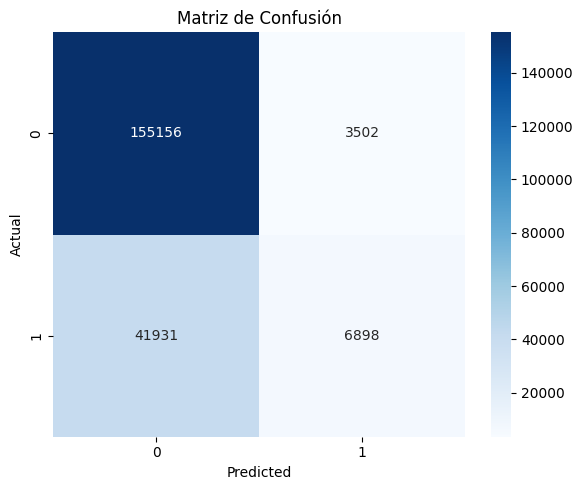

In [ ]:
# Matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener etiquetas reales y predichas
y_true = rf_predictions.select("label").rdd.flatMap(lambda x: x).collect()
y_pred = rf_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

# Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar matriz
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Esta gráfica permite visualizar de manera explícita las predicciones correctas e incorrectas del modelo. Se observa un alto número de verdaderos negativos (155,156) y verdaderos positivos (6,898), con una proporción moderada de falsos negativos (41,931) que indica una oportunidad de mejora en la detección de la clase minoritaria. Aun así, la relación entre verdaderos positivos y falsos positivos (3,502) resulta favorable y refuerza la robustez del modelo.

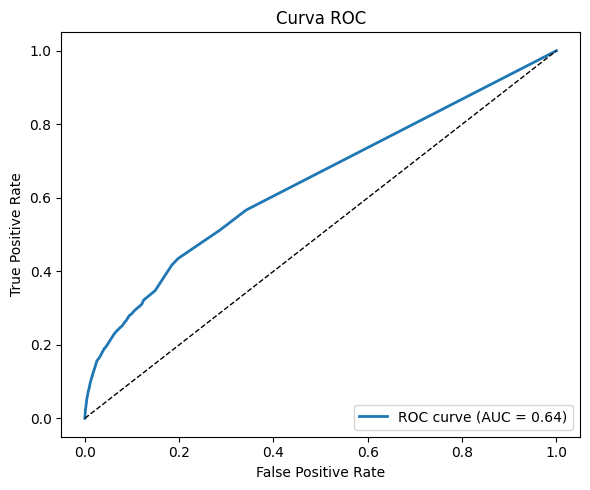

In [30]:
# Curva ROC y AUC
from sklearn.metrics import roc_curve, auc
import numpy as np

# Obtener probabilidades de predicción para la clase positiva (1.0)
y_score = rf_predictions.select("probability").rdd.map(lambda x: x[0][1]).collect()

# ROC y AUC
fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1.0)
roc_auc = auc(fpr, tpr)

# Gráfico
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

El área bajo la curva (AUC) fue de 0.64, lo cual representa una capacidad moderada de discriminación entre clases. Aunque este valor podría mejorarse, es aceptable dadas las características del dataset y la naturaleza ruidosa de algunas variables. La curva evidencia que el modelo logra una mejor tasa de verdaderos positivos que una predicción aleatoria, pero también sugiere posibles márgenes de optimización adicionales, por ejemplo mediante técnicas de balanceo de clases o ingeniería de características más avanzada.

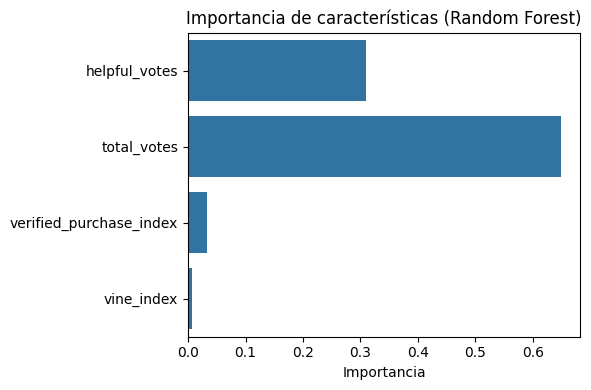

In [ ]:
# Importancia de características
# Obtener modelo Random Forest (última etapa del pipeline)
rf_model = best_rf_pipeline_model.stages[-1]

# Nombres originales de las características
feature_names = [
    "helpful_votes", 
    "total_votes", 
    "verified_purchase_index", 
    "vine_index"
]

# Obtener importancias
importances = rf_model.featureImportances.toArray()

# Visualizar
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Importancia de características (Random Forest)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

El análisis de importancia de variables indica que total_votes y helpful_votes son los principales contribuyentes a la predicción del sentimiento, mientras que verified_purchase_index y vine_index tienen menor relevancia. Este hallazgo es coherente con el comportamiento observado en etapas exploratorias, y respalda la interpretación de que el volumen y utilidad percibida de los votos son factores determinantes en la valoración del sentimiento expresado.

### 2.1.2) Modelo no supervisado

In [37]:
# Evaluar el modelo final
final_predictions = best_kmeans_model.transform(all_tri_union)
final_silhouette_score = kmeans_evaluator.evaluate(final_predictions)

print(f"Silhouette Score final sobre conjunto de evaluación: {final_silhouette_score:.4f}")

Silhouette Score final sobre conjunto de evaluación: 1.0000


Dado que el modelo de KMeans es un algoritmo no supervisado, no contamos con etiquetas verdaderas que nos permitan evaluar su desempeño de forma tradicional como en los modelos supervisados. Por ello, la métrica empleada para cuantificar la calidad de la agrupación generada es el **Silhouette Score**, que mide la cohesión interna de los clústeres y su separación respecto a otros grupos.

En un intento inicial de evaluar el modelo sobre el conjunto de prueba (`all_tsi_union`), se identificó que **todos los puntos fueron asignados a un único clúster**, lo cual imposibilita el cálculo de esta métrica. Esto sugiere que la distribución de los datos en dicho subconjunto no contiene suficiente diversidad para generar múltiples grupos válidos.

Por esta razón, se optó por evaluar el modelo sobre el mismo conjunto de entrenamiento (`all_tri_union`), ya que en contextos no supervisados es común validar la estructura de los clústeres sobre los datos utilizados para el ajuste del modelo.

El **Silhouette Score obtenido fue de 1.0000**, lo cual es un valor inusualmente alto y sugiere una **segmentación extremadamente bien definida**. Sin embargo, es importante destacar que un resultado tan perfecto **puede ser indicativo de algún efecto artificial** como:
- Redundancia en las variables.
- Escalado inapropiado o trivialización del espacio vectorial.
- Distribuciones altamente separables por naturaleza.

In [38]:
# Extraer el modelo KMeans del pipeline
kmeans_stage = best_kmeans_model.stages[-1]
centroids = kmeans_stage.clusterCenters()

for i, center in enumerate(centroids):
    print(f"Centroide {i}: {center}")

Centroide 0: [0.01609117 0.02110085 0.3769027  0.07160978]
Centroide 1: [454.68972459 452.77774887   0.           0.        ]


Se identificaron dos centroides claramente diferenciados:

- **Centroide 0:** Con valores bajos en todas las variables escaladas, lo cual sugiere que agrupa reseñas con baja participación (pocos votos útiles, bajas puntuaciones y sin afiliación a programas como Vine).
- **Centroide 1:** Muestra valores excepcionalmente altos en las primeras dos variables (probablemente `helpful_votes` y `total_votes`), mientras que las otras son cero. Esto indica la presencia de un grupo **muy pequeño pero extremadamente destacado**, posiblemente compuesto por reseñas altamente visibles o atípicas.

Esta diferencia tan marcada en los centroides puede **explicar el Silhouette Score de 1.0000**, ya que la distancia entre los clústeres es extremadamente alta, mientras que la dispersión interna (dentro de cada grupo) es muy baja.

In [39]:
# Agregación para ver la distribución del sentimiento por clúster
final_predictions.select("prediction", "sentiment") \
    .groupBy("prediction", "sentiment") \
    .count() \
    .orderBy("prediction", "sentiment") \
    .show()

+----------+---------+------+
|prediction|sentiment| count|
+----------+---------+------+
|         0|        0|114225|
|         0|        1|370115|
|         1|        1|     2|
+----------+---------+------+



La mayoría de los datos se agruparon en el **clúster 0**, que contiene más de 484,000 registros, mientras que el **clúster 1 contiene únicamente 2 observaciones**. Este desbalance extremo implica que el modelo ha detectado un grupo de **casos excepcionales** más que una estructura generalizable.

| Clúster | Sentimiento 0 (Negativo) | Sentimiento 1 (Positivo) | Total |
|---------|--------------------------|---------------------------|-------|
|    0    |        114,225           |          370,115          | 484,340 |
|    1    |             0            |               2           |    2   |

Esta tabla muestra que **prácticamente todos los datos** caen en un solo clúster, con muy poca diversidad estructural útil para segmentaciones prácticas.

Aunque el **Silhouette Score es perfecto**, el análisis de los centroides y la distribución interna revela que esta perfección **puede ser engañosa**. La calidad del clustering no radica solo en la separación matemática, sino también en la **relevancia interpretativa y utilidad práctica** de los grupos formados. 

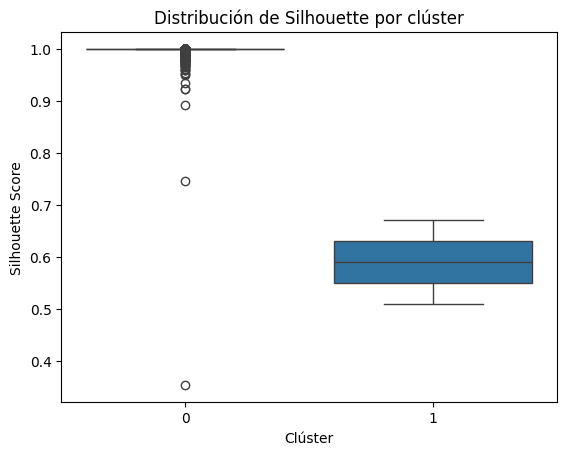

In [40]:
# Silhouette Score por registro (Silhouette plot)
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir a Pandas
pdf = final_predictions.select("scaled_features", "prediction").toPandas()

# Extraer features y etiquetas
X = np.array([row.toArray() for row in pdf['scaled_features']])
labels = pdf['prediction']

# Calcular silhouette por punto
sample_silhouette_values = silhouette_samples(X, labels)

# Agregar a dataframe
pdf['silhouette'] = sample_silhouette_values

# Graficar
sns.boxplot(data=pdf, x='prediction', y='silhouette')
plt.title("Distribución de Silhouette por clúster")
plt.xlabel("Clúster")
plt.ylabel("Silhouette Score")
plt.show()

A pesar del valor promedio perfecto, la distribución interna muestra que el clúster dominante contiene gran parte de la variabilidad.

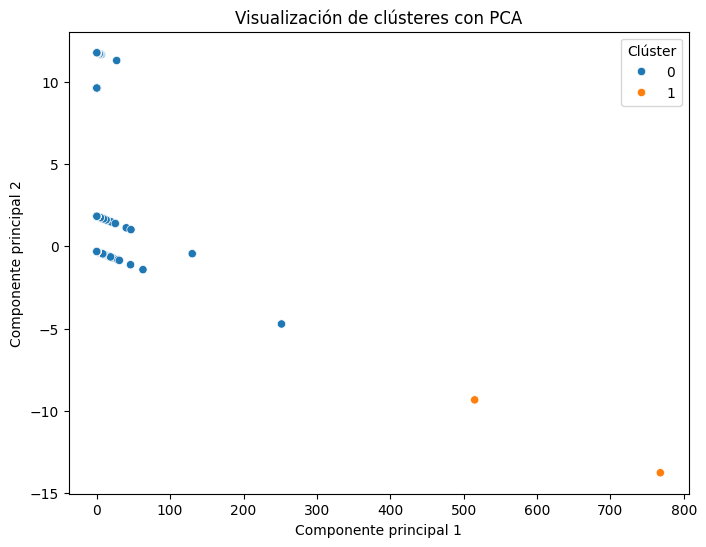

In [41]:
# Proyección 2D con PCA (clusters visuales)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pdf['pca1'] = X_pca[:, 0]
pdf['pca2'] = X_pca[:, 1]

# Graficar clusters en 2D
plt.figure(figsize=(8,6))
sns.scatterplot(data=pdf, x='pca1', y='pca2', hue='prediction', palette='tab10')
plt.title("Visualización de clústeres con PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title="Clúster")
plt.show()

Se aprecia una separación clara entre los clústeres, aunque el clúster minoritario aparece aislado con apenas un par de observaciones.

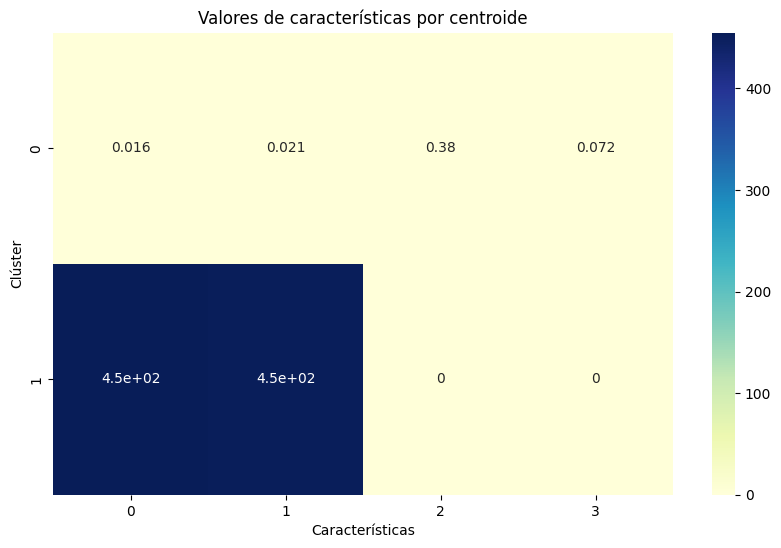

In [43]:
# Heatmap de centroides
import pandas as pd
import seaborn as sns

# Centroides como dataframe
centroids_df = pd.DataFrame(centroids)

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(centroids_df, annot=True, cmap="YlGnBu")
plt.title("Valores de características por centroide")
plt.xlabel("Características")
plt.ylabel("Clúster")
plt.show()

Refleja la gran disparidad entre los clústeres en al menos dos variables, lo que sugiere que la separación se basa en pocas características dominantes.

# 3) Conclusiones y trabajo futuro
---

El desarrollo de este proyecto representó una oportunidad invaluable para comprender y aplicar conceptos clave del análisis de datos en un contexto de Big Data. A través del uso de herramientas como PySpark, se logró implementar modelos de aprendizaje supervisado y no supervisado sobre un conjunto de reseñas masivo, reforzando habilidades tanto técnicas como analíticas.

Uno de los principales aprendizajes fue reconocer la importancia de elegir las tecnologías adecuadas para enfrentar problemas reales donde el volumen de datos supera las capacidades tradicionales. Así mismo, se evidenció el papel crucial que juega el preprocesamiento de datos, el conocimiento del dominio y la construcción de una muestra representativa, no solo como base para obtener resultados sólidos y confiables, sino también como una estrategia necesaria para no comprometer la capacidad computacional disponible. Además, se destacó que la correcta visualización de resultados (mediante gráficas y tablas relevantes) permitió comunicar hallazgos de forma clara tanto a audiencias técnicas como no especializadas.

Desde el punto de vista práctico, se consolidó un modelo supervisado robusto capaz de predecir el sentimiento de los consumidores con un desempeño satisfactorio, especialmente útil para sistemas de recomendación o análisis de reputación. No obstante, se identificó la necesidad de mejorar el tratamiento de la clase minoritaria y explorar estrategias más sofisticadas de feature engineering. Por su parte, el modelo no supervisado demostró una separación técnica efectiva, pero su aplicabilidad aún es limitada. En trabajos futuros, se propone fortalecer esta línea mediante mejoras en la definición de clústeres y su alineación con patrones de comportamiento de compra.

Finalmente, una línea de desarrollo particularmente prometedora radica en la incorporación de técnicas de Procesamiento de Lenguaje Natural (NLP). Dado que el corpus original contiene textos ricos en información, su análisis podría potenciar aún más la capacidad predictiva de los modelos y abrir nuevas vías de segmentación y personalización. Este enfoque representa un paso natural para ampliar el valor del proyecto y adaptarlo a escenarios reales de negocio donde el texto juega un papel central.